# Store Sales 데이터 시각화

## 데이터 로드 / 필요한 라이브러리 임포트

In [1]:
!unzip -qq "/content/drive/MyDrive/Colab Notebooks/project/competition/캐글-Store Sales/store-sales-time-series-forecasting.zip"

In [35]:
# 필요한 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [3]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


> ⛳ 컬럼 정보
- date: 날짜
- store_nbr: 상점
- family: 제품군
- sales: 판매량
- onpromotion: 특정 날짜에 홍보중인 제품군 품목 수

## EDA (train.csv)

### 기초 통계량 (평균, 표준편차, 사분위수, 최빈값 등)

> 🧑 : 먼저 데이터의 기초 통계량을 확인하자.
> - categorical 변수는 unique(카테고리 개수), 최빈값, 최빈값의 빈도를 확인할 수 있다.
- numerical 변수는 평균, 사분위수, 최대값, 최소값, 표준편차를 확인 할 수 있다.

In [4]:
# store_nbr은 categorical 변수로, 데이터 타입을 object로 변경
train_df['store_nbr'] = train_df['store_nbr'].astype('object')

train_df.describe(include='all')

,id,date,store_nbr,family,sales,onpromotion
count,3.000888e+06,3000888,3000888.0,3000888,3.000888e+06,3.000888e+06
unique,NaN,1684,54.0,33,NaN,NaN
top,NaN,2013-01-01,1.0,AUTOMOTIVE,NaN,NaN
freq,NaN,1782,55572.0,90936,NaN,NaN
mean,1.500444e+06,NaN,NaN,NaN,3.577757e+02,2.602770e+00
std,8.662819e+05,NaN,NaN,NaN,1.101998e+03,1.221888e+01
min,0.000000e+00,NaN,NaN,NaN,0.000000e+00,0.000000e+00
25%,7.502218e+05,NaN,NaN,NaN,0.000000e+00,0.000000e+00
50%,1.500444e+06,NaN,NaN,NaN,1.100000e+01,0.000000e+00
75%,2.250665e+06,NaN,NaN,NaN,1.958473e+02,0.000000e+00



### 학습 데이터 수집 기간 / 판매량 (Line Plot)

> 🧑 : 학습 데이터 수집 기간 동안 판매량이 어떻게 변화하는지 살펴보자.




> ⚡ 참고할 시각화 규칙
1. **테두리를 없애자!**<br>
불필요한 테두리는 우리의 시각을 분산시킬 수 있다고 한다. <br>
필요한 정보에 집중할 수 있도록 테두리를 지우자.<br>
2. **색은 필요할때만 쓰자!**<br>
색은 강조하고 싶은 정보가 있을때만 사용하자!
3.그래프와 제목 사이에 적절한 간격을 두자!







In [5]:
# 데이트 컬럼 타입 변경
train_df['date'] = pd.to_datetime(train_df['date'],format = "%Y-%m-%d")

In [6]:
# 주별로 데이터 집계. 데이터 개수가 너무 많기 때문에, 주, 월 년도 별로 미리 그룹화 하는 것이 좋음.
weekly_group_df = train_df.groupby([pd.Grouper(key='date', freq='W')]).agg(sales = ('sales', 'mean')).reset_index()

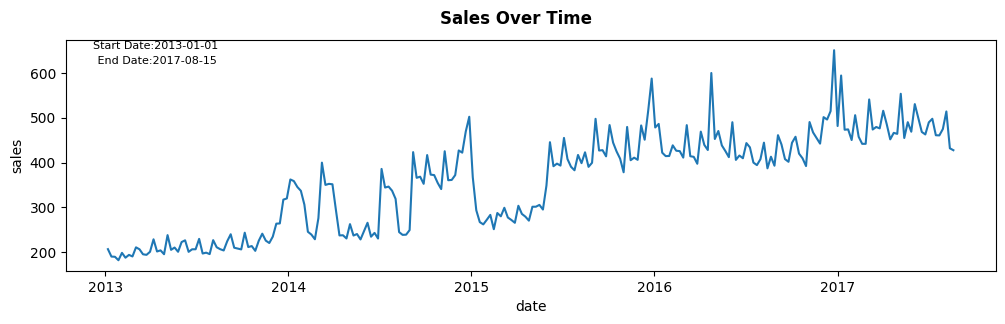

In [7]:
# 시각화

fig, ax = plt.subplots(figsize=(12, 3))
# line plot
sns.lineplot(x='date', y='sales', data=weekly_group_df)
fig.suptitle('Sales Over Time', fontweight='bold')
fig.text(s=f"Start Date:{train_df['date'].min().strftime('%Y-%m-%d')}",
         x=0.20, y= 0.85, ha='center',fontsize=8)
fig.text(s=f" End Date:{train_df['date'].max().strftime('%Y-%m-%d')}",
         x=0.20, y= 0.80, ha='center',fontsize=8)

plt.show()

>☝ 해석
- 2013년부터 2017년 8월 15일까지의 데이터이다.
- 전체 sales가 조금씩 상승하는 경향이 있다. 데이터가 비정상적(Nonstational)이다. <br>

> ❎ 문제점 <br>
- 불필요한 색 <br>
라인이 파란색이다. 그런데 위 그래프에서 색은 어떤 추가 정보도 가져다주지 못하므로 불필요하다.
- 불필요한 테두리<br>
우측과 상단의 테두리는 우리의 시각이 그래프의 라인에 집중하는 것을 방해한다.<br>

>🧑: 위 그래프를 아래와 같이 다시 그려보자


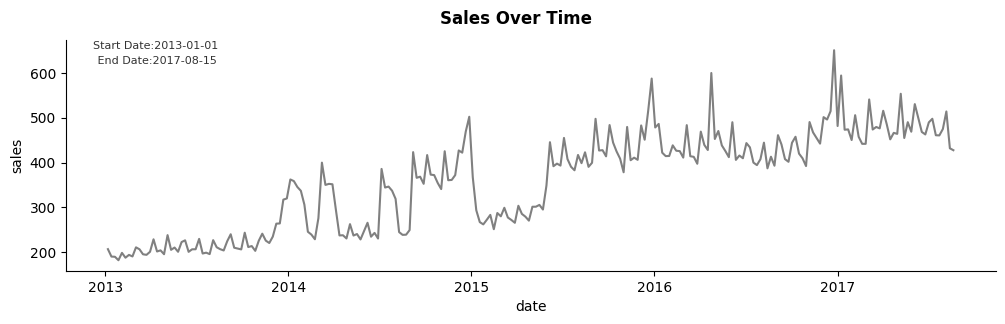

In [8]:
fig, ax = plt.subplots(figsize=(12, 3))
# line plot
sns.lineplot(x='date', y='sales', data=weekly_group_df, color='#808080')
fig.suptitle('Sales Over Time', fontweight='bold')
sns.despine(right=True, top=True)
fig.text(s=f"Start Date:{train_df['date'].min().strftime('%Y-%m-%d')}",
         x=0.20, y= 0.85, ha='center', color='#333333',fontsize=8)
fig.text(s=f" End Date:{train_df['date'].max().strftime('%Y-%m-%d')}",
         x=0.20, y= 0.80, ha='center', color='#333333',fontsize=8)

plt.show()

> ✅ 개선 <br>
- 작은 차이지만,
그래프의 라인과 좌측 상단의 데이터 수집기간 정보가 더 눈에 들어온다.<br>

> 🧑: 앞으로는 모든 그래프에서 상단, 우측 테두리를 제거하겠다.

In [9]:
# top, right 축 제거
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

### 판매량 경향 (Box Plot)

> 🧑: 연도별 Box Plot을 활용해서 데이터 분포의 변화를 확인할 수 도 있다.
- line plot은 시간에 따른 추이를 시각화 할때 효과적이다.
- box plot은 데이터의 분포가 시간에 따라 어떻게 변화하는지 확인할 수 있다.

> ⚡ 참고할 시각화 규칙
1. **이상치가 있을떄 시각화**<br>
이상치의 영향을 제거하고 시각화하자.
2. **색은 적게 사용하자**<br>
눈에 띄는 다양한 색상이 있으면 사용자가 데이터에서 의미를 추출하는 것이 더 어려워질 수 있다.

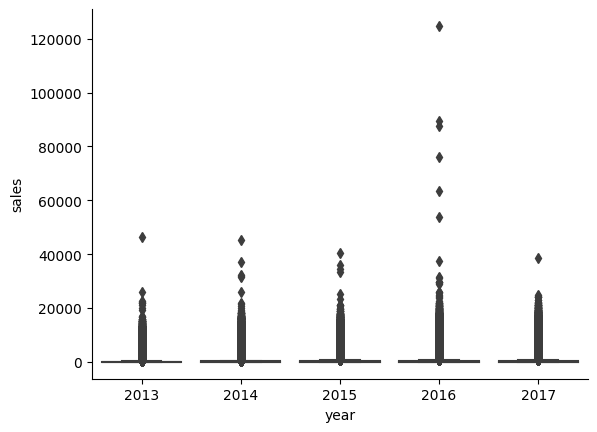

In [10]:
train_df['year'] = train_df['date'].dt.year

sns.boxplot(y='sales', x='year', data=train_df)
fig.suptitle('Sales Over Time', fontweight='bold')
plt.show()

> ❎ 문제점 <br>
- 많은 이상치가 Sales의 평균값을 훨씬 웃돌기 때문에 Box Plot의 중요한 정보들이 보이지 않음

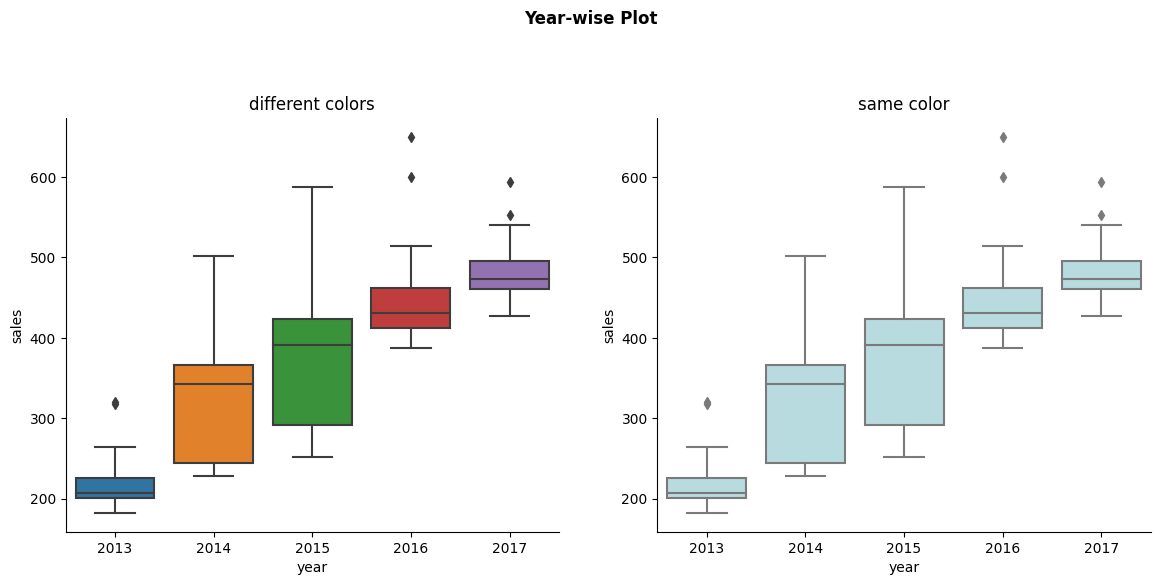

In [11]:
# 이상치를 제거하기 위해 주별로 평균 내준 데이터를 사용
weekly_group_df['year'] = weekly_group_df['date'].dt.year

fig, axes = plt.subplots(1,2, figsize=(14,6))

sns.boxplot(y='sales', x='year', data=weekly_group_df, ax=axes[0])
sns.boxplot(y='sales', x='year', data=weekly_group_df, color='#B0E0E6', ax=axes[1])
fig.suptitle('Year-wise Plot', fontweight='bold')
axes[0].set_title("different colors")
axes[1].set_title("same color")
plt.subplots_adjust(top=0.8)
plt.show()

> ✅개선<br>
- 주별 평균 데이터를 사용해서, 이상치를 제거하는 효과를 줌
- 동일한 색상을 사용하면 사용자는 색상에 주의를 기울이지 않고 데이터 패턴에 주의를 기울일 수 있음

### 월별 판매량 (Violin Plot)

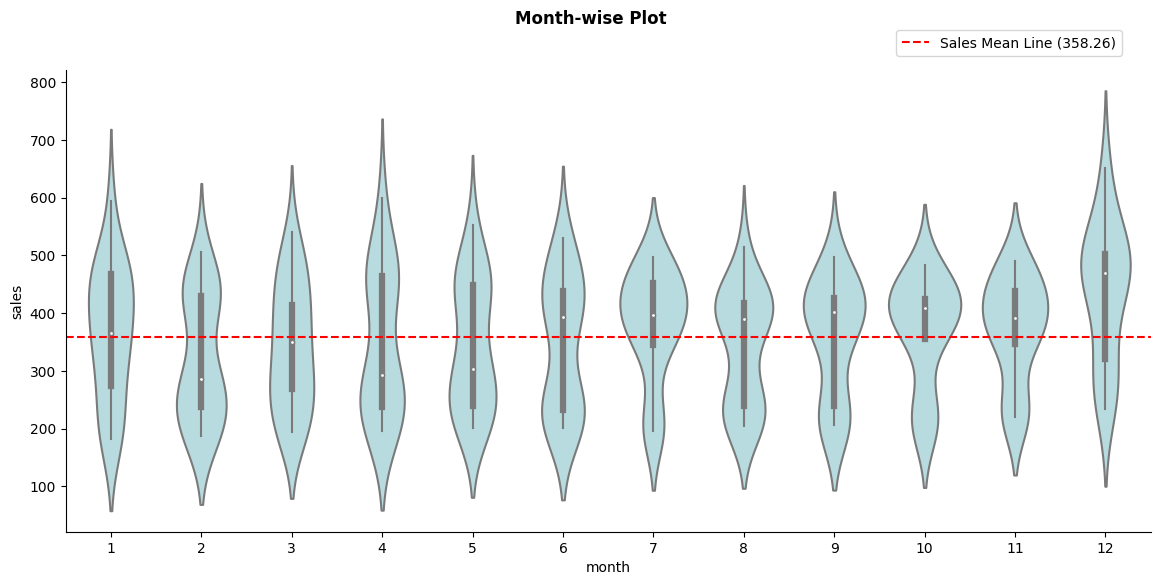

In [12]:
weekly_group_df['month'] = weekly_group_df['date'].dt.month

fig, axes = plt.subplots(figsize=(14,6))
avg = weekly_group_df['sales'].mean()
sns.violinplot(y='sales', x='month', data=weekly_group_df, color='#B0E0E6')
plt.axhline(avg, ls='--', color='r', label=f'Sales Mean Line ({round(avg,2)})')
fig.suptitle('Month-wise Plot', fontweight='bold')
plt.legend(bbox_to_anchor=(0.98, 1.1),loc='upper right')
plt.show()

### 요일별 판매량 (Bar Plot)

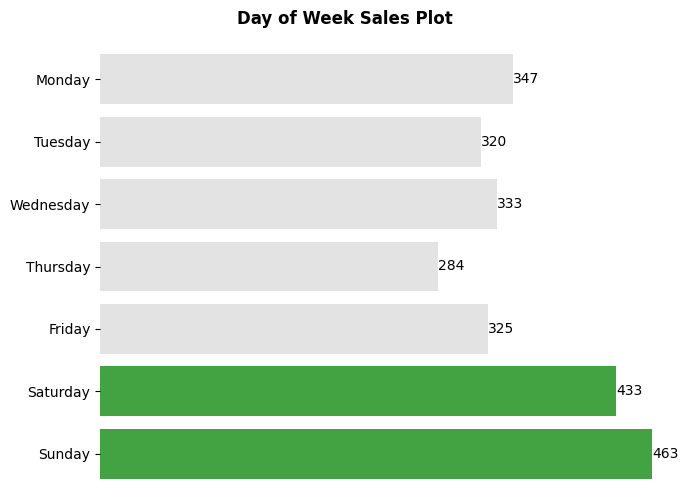

In [13]:
daily_group_df = train_df.groupby([pd.Grouper(key='date', freq='d')]).agg(sales = ('sales', 'mean')).reset_index()

order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

fig, ax = plt.subplots(figsize=(7,5))
palette = ['#dddddd'] * 7
palette[5:] = ['#00A000','#00A000']

daily_group_df['day_of_week'] = daily_group_df['date'].dt.day_name()
sns.barplot(x='sales', y='day_of_week', data=daily_group_df, order=order,
            errorbar=('ci', False), palette=palette, alpha=0.8)
ax.bar_label(ax.containers[0],fmt='%.0f')
sns.despine(left=True, bottom=True)
plt.xticks([])
plt.ylabel('')
plt.xlabel('')
fig.suptitle('Day of Week Sales Plot', fontweight='bold')
plt.tight_layout()
plt.show()

### 제품군 종류 (Bar Plot)

> 🧑: 어떤 제품군들이 판매되고 있는지도 알아보자

> ⚡ 참고할 시각화 규칙
1. **그래프 배치 순서에 의미를 두자!**
2. **색은 강조하고 싶은 부분에만! 최대한 적은 개수를 사용하자!**



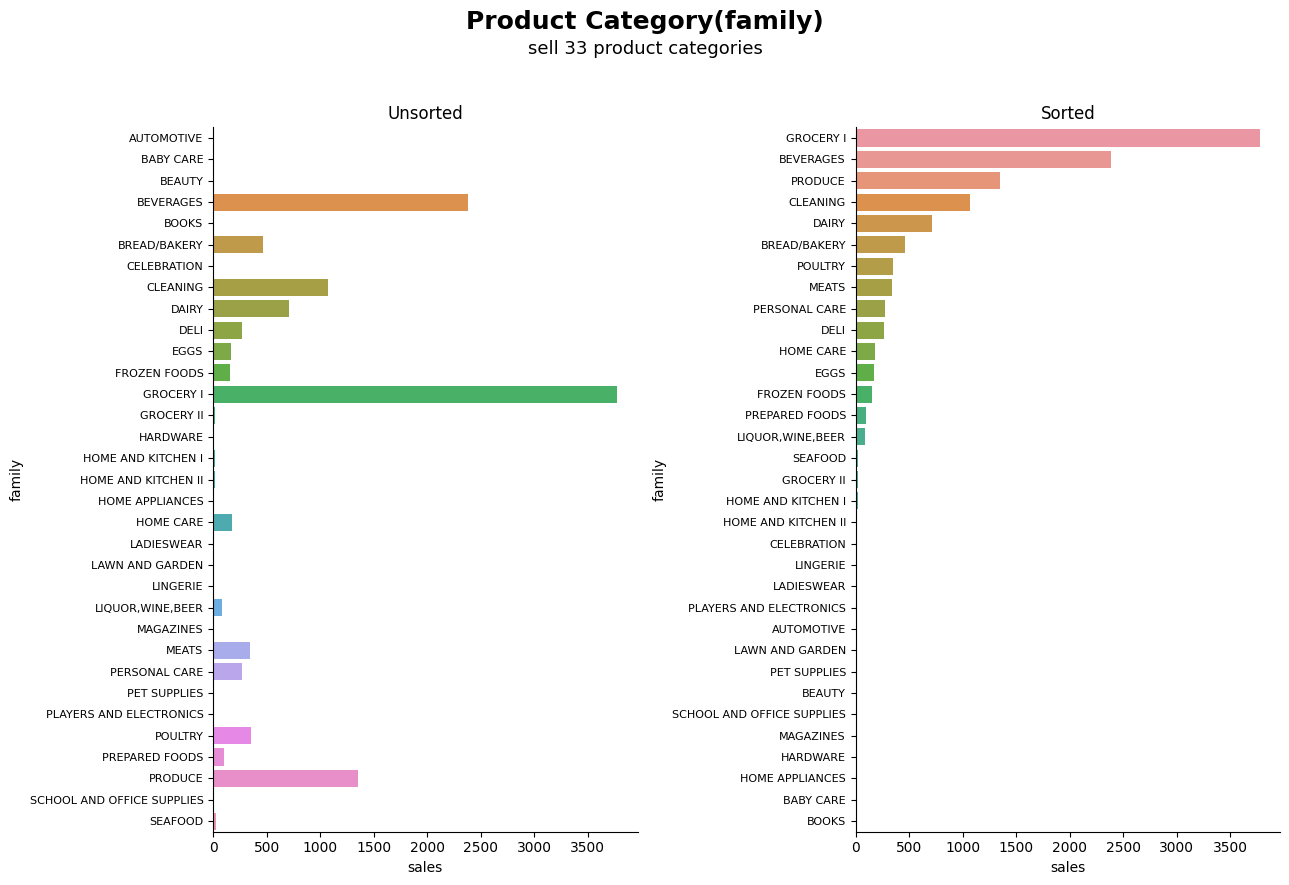

In [14]:
num_unique_family = len(train_df['family'].unique())
# 데이터를 미리 그룹화 해주었습니다. 미리 그룹화 하지 않으면 bar 그래프를 그리는데 오래 걸립니다.
family_group = train_df.groupby('family').agg(sales=('sales','mean')).reset_index()
sorted_family_group = train_df.groupby('family').agg(sales=('sales','mean')).reset_index().sort_values(by='sales', ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(13, 8))

for ax, data, title in zip(axes, [family_group, sorted_family_group],['Unsorted','Sorted']):
    ax.tick_params(axis='y', labelsize=8)
    ax.set_title(title)
    sns.barplot(y='family', x='sales', data=data, ax=ax)

plt.tight_layout()
fig.suptitle("Product Category(family)", y=1.1, fontsize=18, fontweight='bold')
fig.text(x=0.41,y= 1.045, s= f"sell {num_unique_family} product categories", fontsize=13)
plt.show()


> :☝ 해석
- 총 33개의 제품이 판매되고 있다.
- GROCERY1 제품이 가장 많이 판매되는 것도 확인할 수 있다.

> ❎ 문제점(첫번째 그림)<br>
그런데 그래프에 문제가 있다. 정렬이 되어있지 않아 데이터가 눈에 잘 들어오지 않는다.<br>
- 배치가 올바르지 않으면 그래프를 읽기 힘들다.
- 불필요하게 너무 많은 색을 사용하였다.


> ✅개선(두번째 그림)
- 그래프 배치에 신경을 쓰니, 어떤 제품들 순서로 많이 판매되는지를 알 수 있습니다. <br>

> 🧑: 이것만으로도 충분할수 있지만, 색이 불필요하게 많이 사용되었다.<br>
들어오는 정보가 많으면, 인간의 뇌는 정작 필요한 정보는 쉽게 놓친다고 한다.

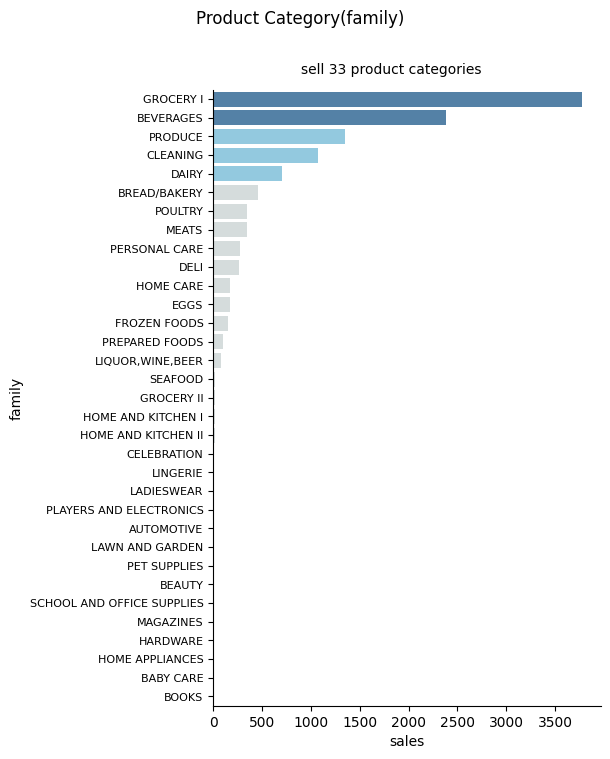

In [15]:
num_unique_family = len(train_df['family'].unique())
# 데이터를 미리 그룹화 해주었습니다. 미리 그룹화 하지 않으면 bar 그래프를 그리는데 오래 걸립니다.
family_group = train_df.groupby('family').agg(sales=('sales','mean')).reset_index().sort_values(by='sales', ascending=False)

#color map
color_map = ['#d4dddd' for _ in range(num_unique_family)]
color_map[:5] = ['#87CEEB']*5
color_map[:2] = ['#4682B4']*2

fig, ax = plt.subplots(figsize=(5, 8))
ax.tick_params(axis='y', labelsize=8)
sns.barplot(y='family', x='sales', data=family_group, palette=color_map)
fig.suptitle("Product Category(family)", x=0.3 )
fig.text(x=0.3, y= 0.90, s= f"sell {num_unique_family} product categories")
plt.show()

> ✅개선
- 많이 판매되는 5개 제품군을 강조할 수 있다.

### 주요 제품군들의 판매량

> 🧑: 주요 제품군별로 판매량 추세를 살펴보자

> ⚡ 참고할 시각화 규칙
> 1. 강조하고 싶은 데이터에만 색을 쓰자

In [16]:
# 주요 판매 제품군
top_products = family_group[:5]['family']

weekly_family_group_df = train_df.groupby([pd.Grouper(key='date', freq='W'), 'family']).agg(sales = ('sales', 'mean'), onpromotions=('onpromotion', 'mean')).reset_index()
weekly_family_group_df=weekly_family_group_df[weekly_family_group_df['family'].isin(top_products)]

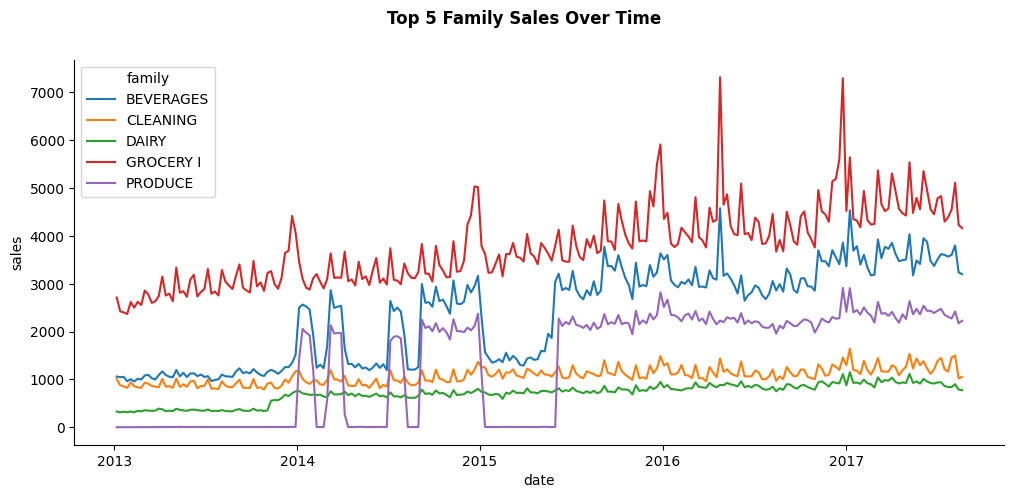

In [17]:
fig, ax = plt.subplots(figsize=(12, 5))
# line plot
sns.lineplot(x='date', y='sales', hue='family',data=weekly_family_group_df)
fig.suptitle('Top 5 Family Sales Over Time', fontweight='bold')

plt.show()

>☝ 해석
- PRODUCE, BEVERAGES가 상당히 유사한 판매 패턴을 보인다.
- GROCERY 1도 판매량의 변화 패턴이 PRODUCE, BEVERAGES와 약간 유사해 보인다.



> ❎문제점<br>
- 너무 많은 색이 있어 패턴이 비슷한 데이터가 눈에 들어오지 않는다.

> 🧑: 패턴이 유사한 데이터를 강조 해보자.

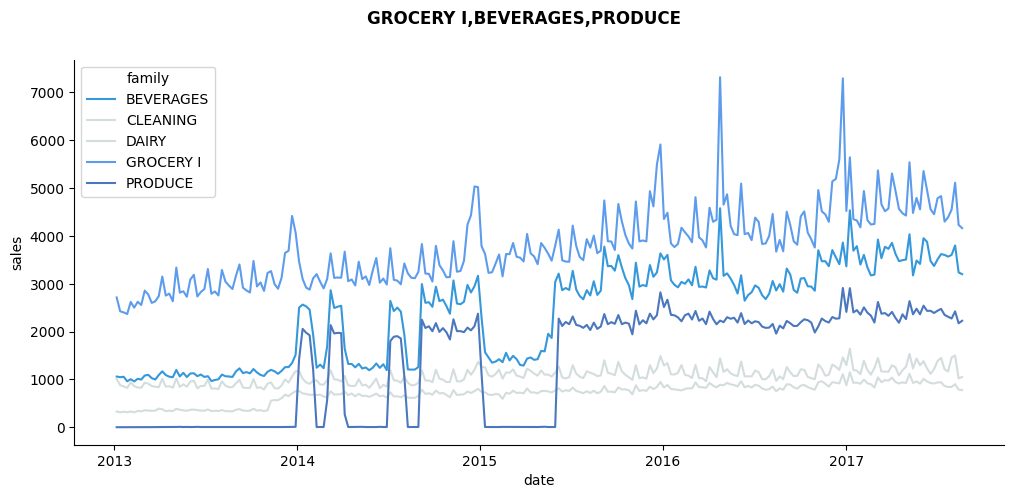

In [18]:
color_map = ['#d4dddd' for _ in range(5)]
color_map[0] = '#3498db'
color_map[3] = '#5d9cec'
color_map[4] = '#4b77be'


weekly_family_group_df = train_df.groupby([pd.Grouper(key='date', freq='W'), 'family']).agg(sales = ('sales', 'mean'), onpromotions=('onpromotion', 'mean')).reset_index()
weekly_family_group_df=weekly_family_group_df[weekly_family_group_df['family'].isin(top_products)]

fig, ax = plt.subplots(figsize=(12, 5))
# line plot
sns.lineplot(x='date', y='sales', hue='family',data=weekly_family_group_df, palette=color_map)
fig.suptitle('GROCERY I,BEVERAGES,PRODUCE', fontweight='bold')

plt.show()

> ✅개선<br>
- 유사한 패턴을 서로 유사한 계열의 색으로 표현하여, 유사성이 더 눈에 띈다.

### Promotions

> 🧑: 프로모션 트렌드를 살펴보자.

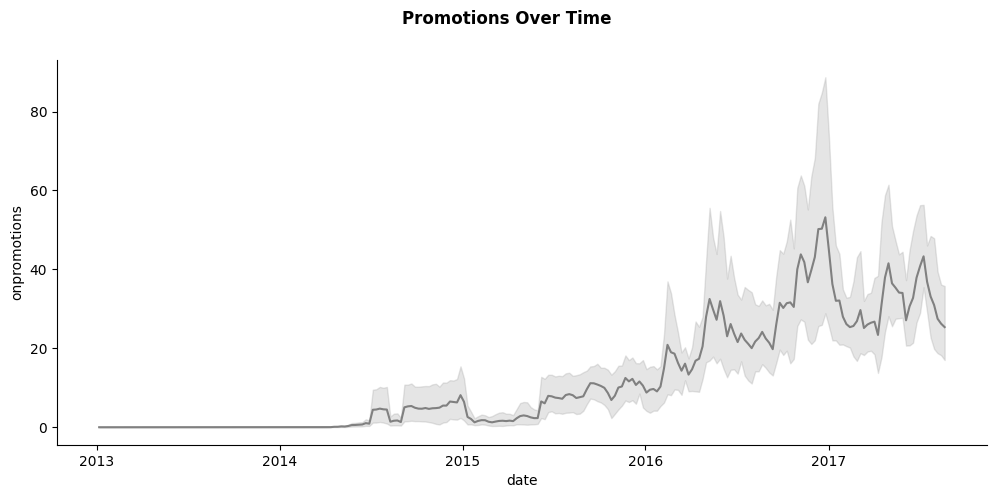

In [19]:
fig, ax = plt.subplots(figsize=(12, 5))
# line plot
sns.lineplot(x='date', y='onpromotions',data=weekly_family_group_df,  color='#808080')
fig.suptitle('Promotions Over Time', fontweight='bold')

plt.show()

>☝ 해석
- promotion이 점점 증가하는 경향이 보인다.


### 프로모션과 판매량 상관관계

> 🧑: 프로모션이 많으면, 제품 판매량이 증가할까?

In [20]:
# 데이터가 정상성을 띄는 2016년 이후만 활용
promotion_df = train_df[train_df['date'] >= '2016-01-01']

In [28]:
# family = promotion_df.family.unique()
promotional_products = ['PLAYERS AND ELECTRONICS', 'PRODUCE',
                        'SCHOOL AND OFFICE SUPPLIES', 'DELI',
                        'BEAUTY']

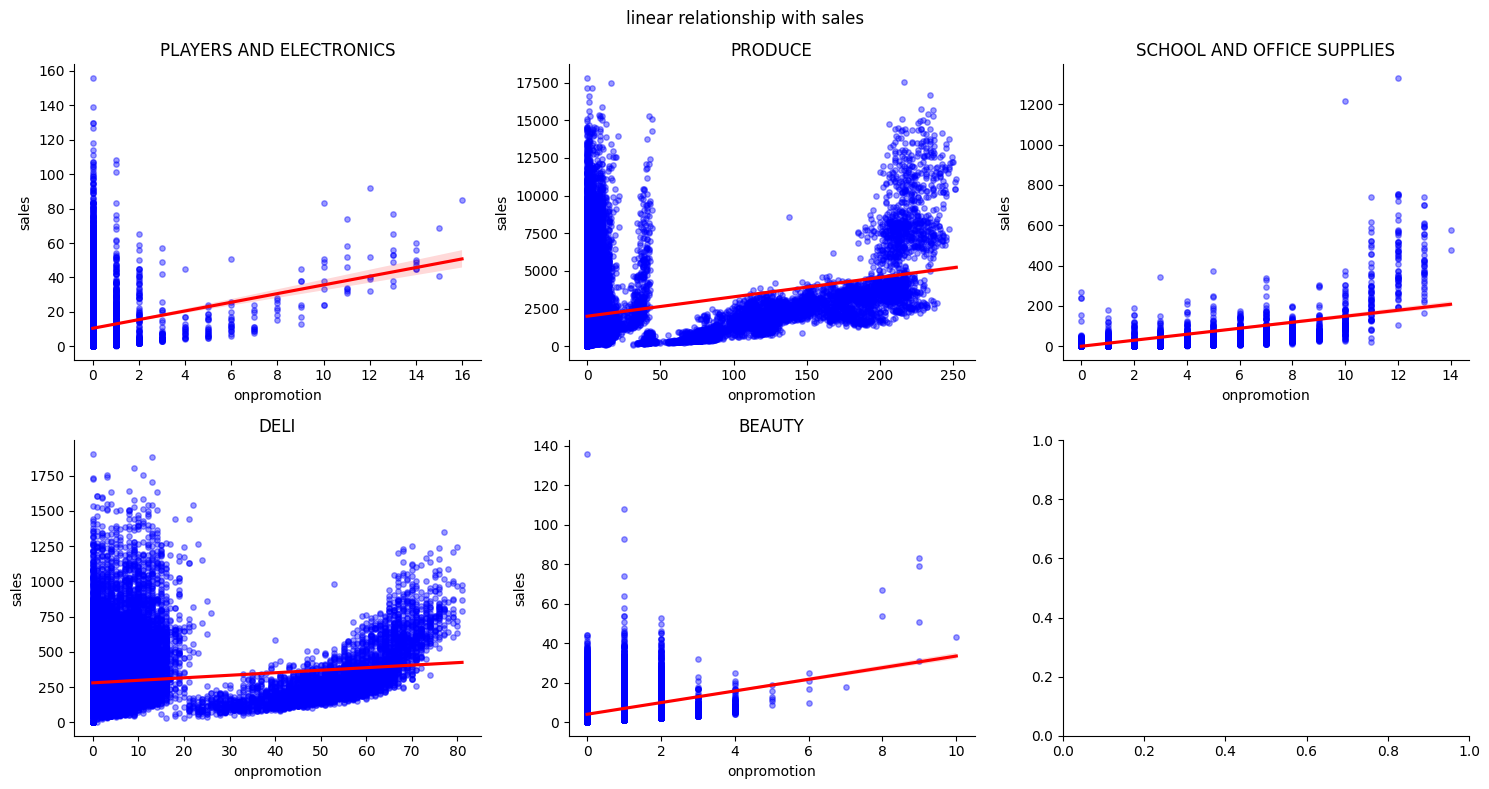

In [46]:
scatter_kws = {'color': 'blue', 'alpha': 0.4, 's': 15}
line_kws = {'color': 'red'}

fig, axes = plt.subplots(2,3, figsize=(15,8))

for ax, p in zip(axes.flatten(), promotional_products):
    sns.regplot(data=promotion_df[promotion_df['family']==p],
               x='onpromotion',y='sales', ax=ax,scatter_kws=scatter_kws, line_kws=line_kws)
    ax.set_title(f'{p}')
fig.suptitle("linear relationship with sales")
plt.tight_layout()
plt.show()


> 🧑: 몇몇 제품군은 Promotion과 Sales에 양의 선형상관관계가 있어 보인다.

### ACF/PACF 상관도표(Correlogram)

> 🧑: ACF/PACF를 사용해 데이터의 정상성을 평가하자(이미 판매량이 점점 증가하는 추세가 있음을 확인했지만). <br>
> - ACF(자기상관함수)는 현재값과 특정 시점 이전(lag)의 값의 상관관계를 보여준다. <br>
> - PACF는 다른 시차의 영향을 제외하고, 현재값과 특정시점 이전의 값의 상관관계를 보여준다. <br>
> - 상관도표를 통해 한눈에 시계열 데이터의 정상성을 판단할 수 있다. <br>
> - 또한 ARIMA 모형의 차수를 결정하는데 도움이 된다.



In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

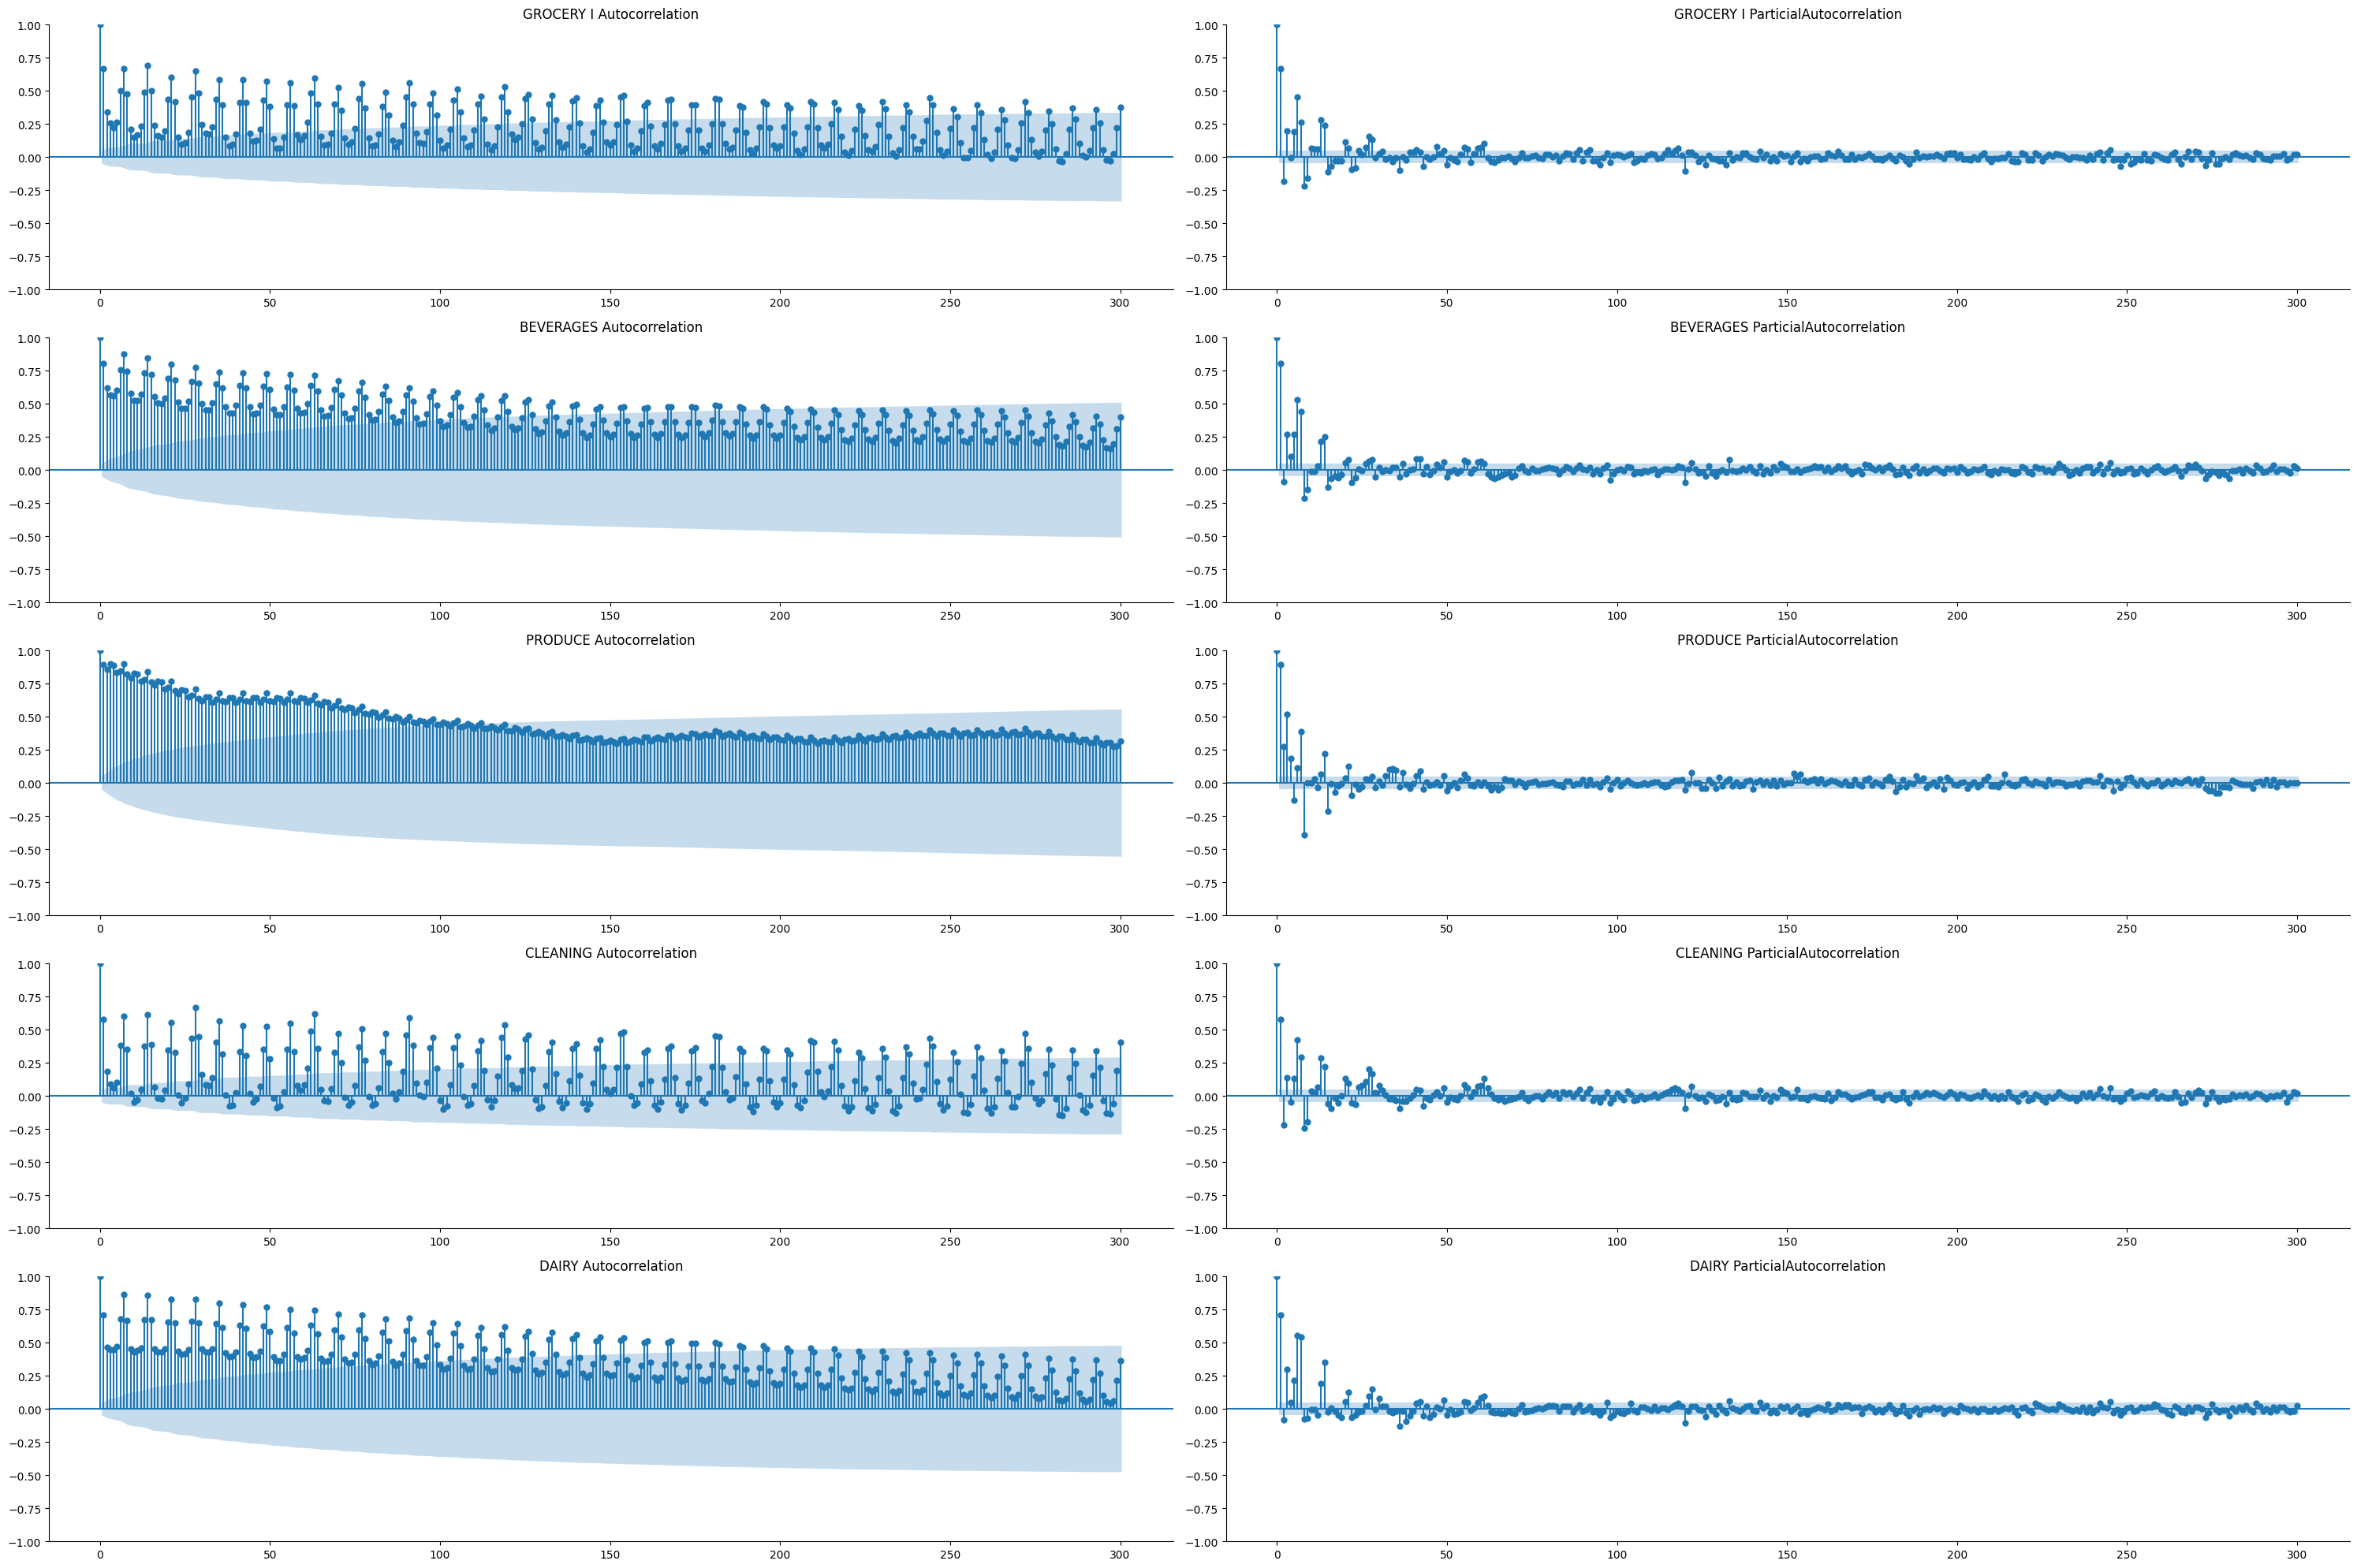

In [24]:
fig, axes = plt.subplots(5,2, figsize=(30,20))

for (ax, k) in zip(axes, top_products):
    d = train_df[train_df['family']==k]
    d = d.groupby(by='date')['sales'].mean()
    plot_acf(d,lags=300, alpha=0.05, ax=ax[0])
    plot_pacf(d, lags=300, alpha=0.05, ax=ax[1])
    ax[0].set_title(f"{k} Autocorrelation")
    ax[1].set_title(f"{k} ParticialAutocorrelation")
    plt.tight_layout()

> 🧑 :
> - ACF, PACF가 특정한 패턴이 없고 랜덤하면, 데이터가 Stationary(정상성)을 가진다고 할 수 있음
> - ACF, PACF가 LAG 1, LAG 2 이후 확 떨어지면 데이터가 Stationary(정상성)을 가진다고 할 수 있음
- ACF, PACF가 천천히 감소하는 형태면 전형적으로 Nonstational한 데이터임


>☝ 해석
- ACF, PACF가 천천히 감소하는 형태로, 데이터가 비정상적임
- Lag 7을 주기로 강한 상관관계가 나타남

